## Project - Applying Data Science Methodology on Red Wine Quality Dataset

<img src="https://media.giphy.com/media/jRuv9xc10lVyE/giphy.gif">

You can read more about the Data Science Methodology from this [IBM whitepaper](https://tdwi.org/~/media/64511A895D86457E964174EDC5C4C7B1.PDF) by John Rollins

[Link](https://archive.ics.uci.edu/ml/datasets/wine+quality) for the dataset for context

<img src="https://media-exp1.licdn.com/dms/image/C4D12AQGOPVf5iqhhwQ/article-inline_image-shrink_1000_1488/0/1597756152693?e=1652918400&v=beta&t=iKZ2jX3khsx11lD9JyZWDz-j-Gt2hZsKPXz5rZ0iE1M">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. 

The goal is to implement Regression Models and Classification Models on the Red Wine Quality Dataset to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

# Student Name: Long Nguyen
# ID: 217488651

### Analytic Approach
Based on the above business understanding one should decide the analytical approach to follow. The approaches can be of 4 types: Descriptive approach (current status and information provided), Diagnostic approach(a.k.a statistical analysis, what is happening and why it is happening), Predictive approach(it forecasts on the trends or future events probability) and Prescriptive approach( how the problem should be solved actually).

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

We are determining which is the best quality wine feature, and we are looking into each of the wine features to our model of red wine quality. Since indicators are needed, we need a Descriptive Approach to understand the data and Diagnostic Approach to determine the best possible outcome for this project.

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

(Reference from the website in Question 3)
 
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

### Data Collection

**Q3. From where do we get our data?**

The data could be found at this website:

https://archive.ics.uci.edu/ml/datasets/wine+quality 

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

The input is the objective tests and output is the sensory data (median of at least 3 expert evaluations). Each expert graded the quality between the scale of 0 - very bad.

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

*TODO*

*TODO*
<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary</li>

The impact of the variables will be known by using different methods to explore the dataset. 



In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from random import randint
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout

In [3]:
db = pd.read_csv("winequality-red.csv")
df = db

### Data Preparation

#### Explore the dataset further
*TODO*
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.isna().sum()  # Checking for any missing value

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

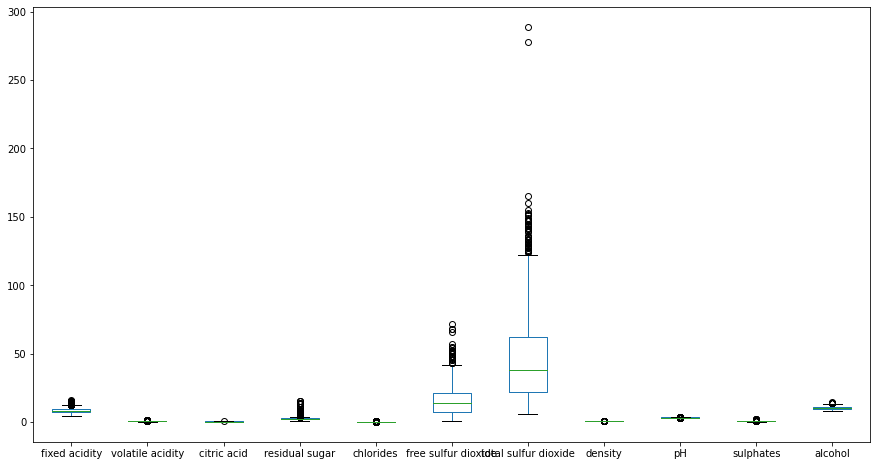

In [8]:
fig = plt.figure(figsize = (15,8))

out = df.drop('quality', axis=1)
out.boxplot(grid=False)

# Checking for outliers

### Handling outliers

<AxesSubplot:>

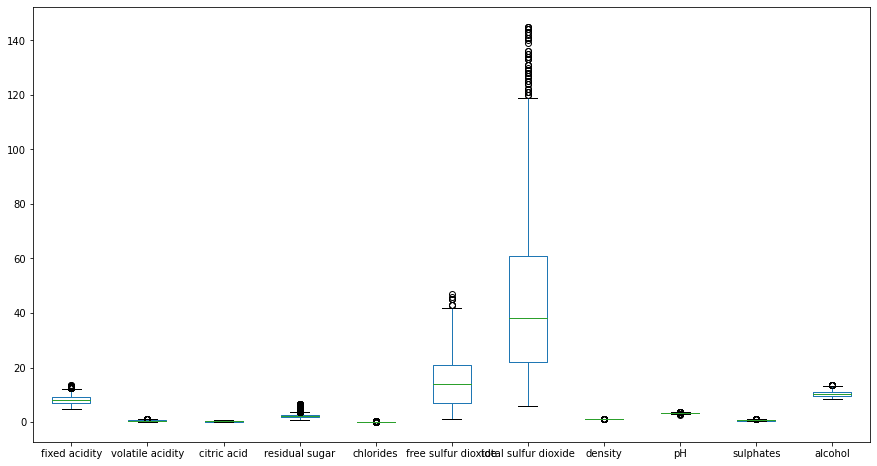

In [9]:
fig = plt.figure(figsize = (15,8))
thresh = 3
f1 = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides","free sulfur dioxide", "total sulfur dioxide", "density","pH","sulphates", "alcohol"]
for f in f1:
    mean = np.mean(df[f])
    std = np.std(df[f]) 
    for x in df[f]:
        z = (x-mean)/std
        if z > thresh:
            df[f] = df[f].replace(x,mean)
        
out = df.drop('quality', axis=1)
out.boxplot(grid=False)

In [10]:
# Correlation heatmap

df.corr().style.background_gradient(cmap='cool')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.265217,0.663645,0.168592,0.202342,-0.152671,-0.111051,0.644614,-0.648393,0.195838,-0.055094,0.121945
volatile acidity,-0.265217,1.000000,-0.559829,0.053430,0.102668,0.002749,0.097539,0.027021,0.222689,-0.321254,-0.209475,-0.367803
citric acid,0.663645,-0.559829,1.000000,0.166148,0.100921,-0.055585,0.007170,0.354462,-0.536597,0.316441,0.123925,0.232137
residual sugar,0.168592,0.053430,0.166148,1.000000,0.139706,-0.007212,0.099545,0.337208,-0.066299,0.071947,0.133772,0.033700
chlorides,0.202342,0.102668,0.100921,0.139706,1.000000,-0.076016,0.062679,0.334631,-0.187308,0.054143,-0.245738,-0.148775
free sulfur dioxide,-0.152671,0.002749,-0.055585,-0.007212,-0.076016,1.000000,0.640789,-0.063132,0.077390,0.035109,-0.066452,-0.046714
total sulfur dioxide,-0.111051,0.097539,0.007170,0.099545,0.062679,0.640789,1.000000,0.087021,-0.047299,-0.040161,-0.247537,-0.206166
density,0.644614,0.027021,0.354462,0.337208,0.334631,-0.063132,0.087021,1.000000,-0.299685,0.145804,-0.481771,-0.177274
pH,-0.648393,0.222689,-0.536597,-0.066299,-0.187308,0.077390,-0.047299,-0.299685,1.000000,-0.075351,0.157233,-0.063623
sulphates,0.195838,-0.321254,0.316441,0.071947,0.054143,0.035109,-0.040161,0.145804,-0.075351,1.000000,0.176190,0.354152


### Using histograms to find the distribution of data

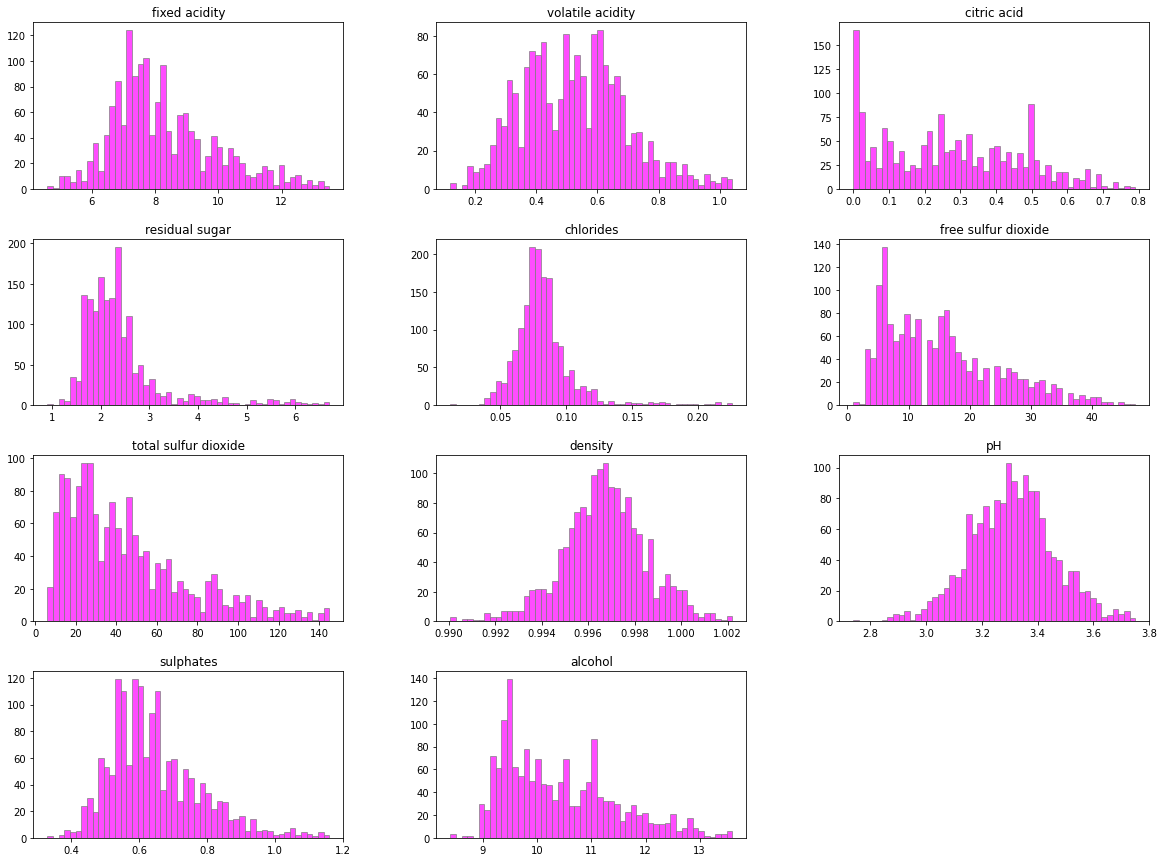

In [11]:
df.drop(['quality'], axis = 1).hist(bins=50, figsize=(20,15),edgecolor='grey',color='magenta',alpha=0.7, grid=False)
plt.show()

<Figure size 1080x504 with 0 Axes>

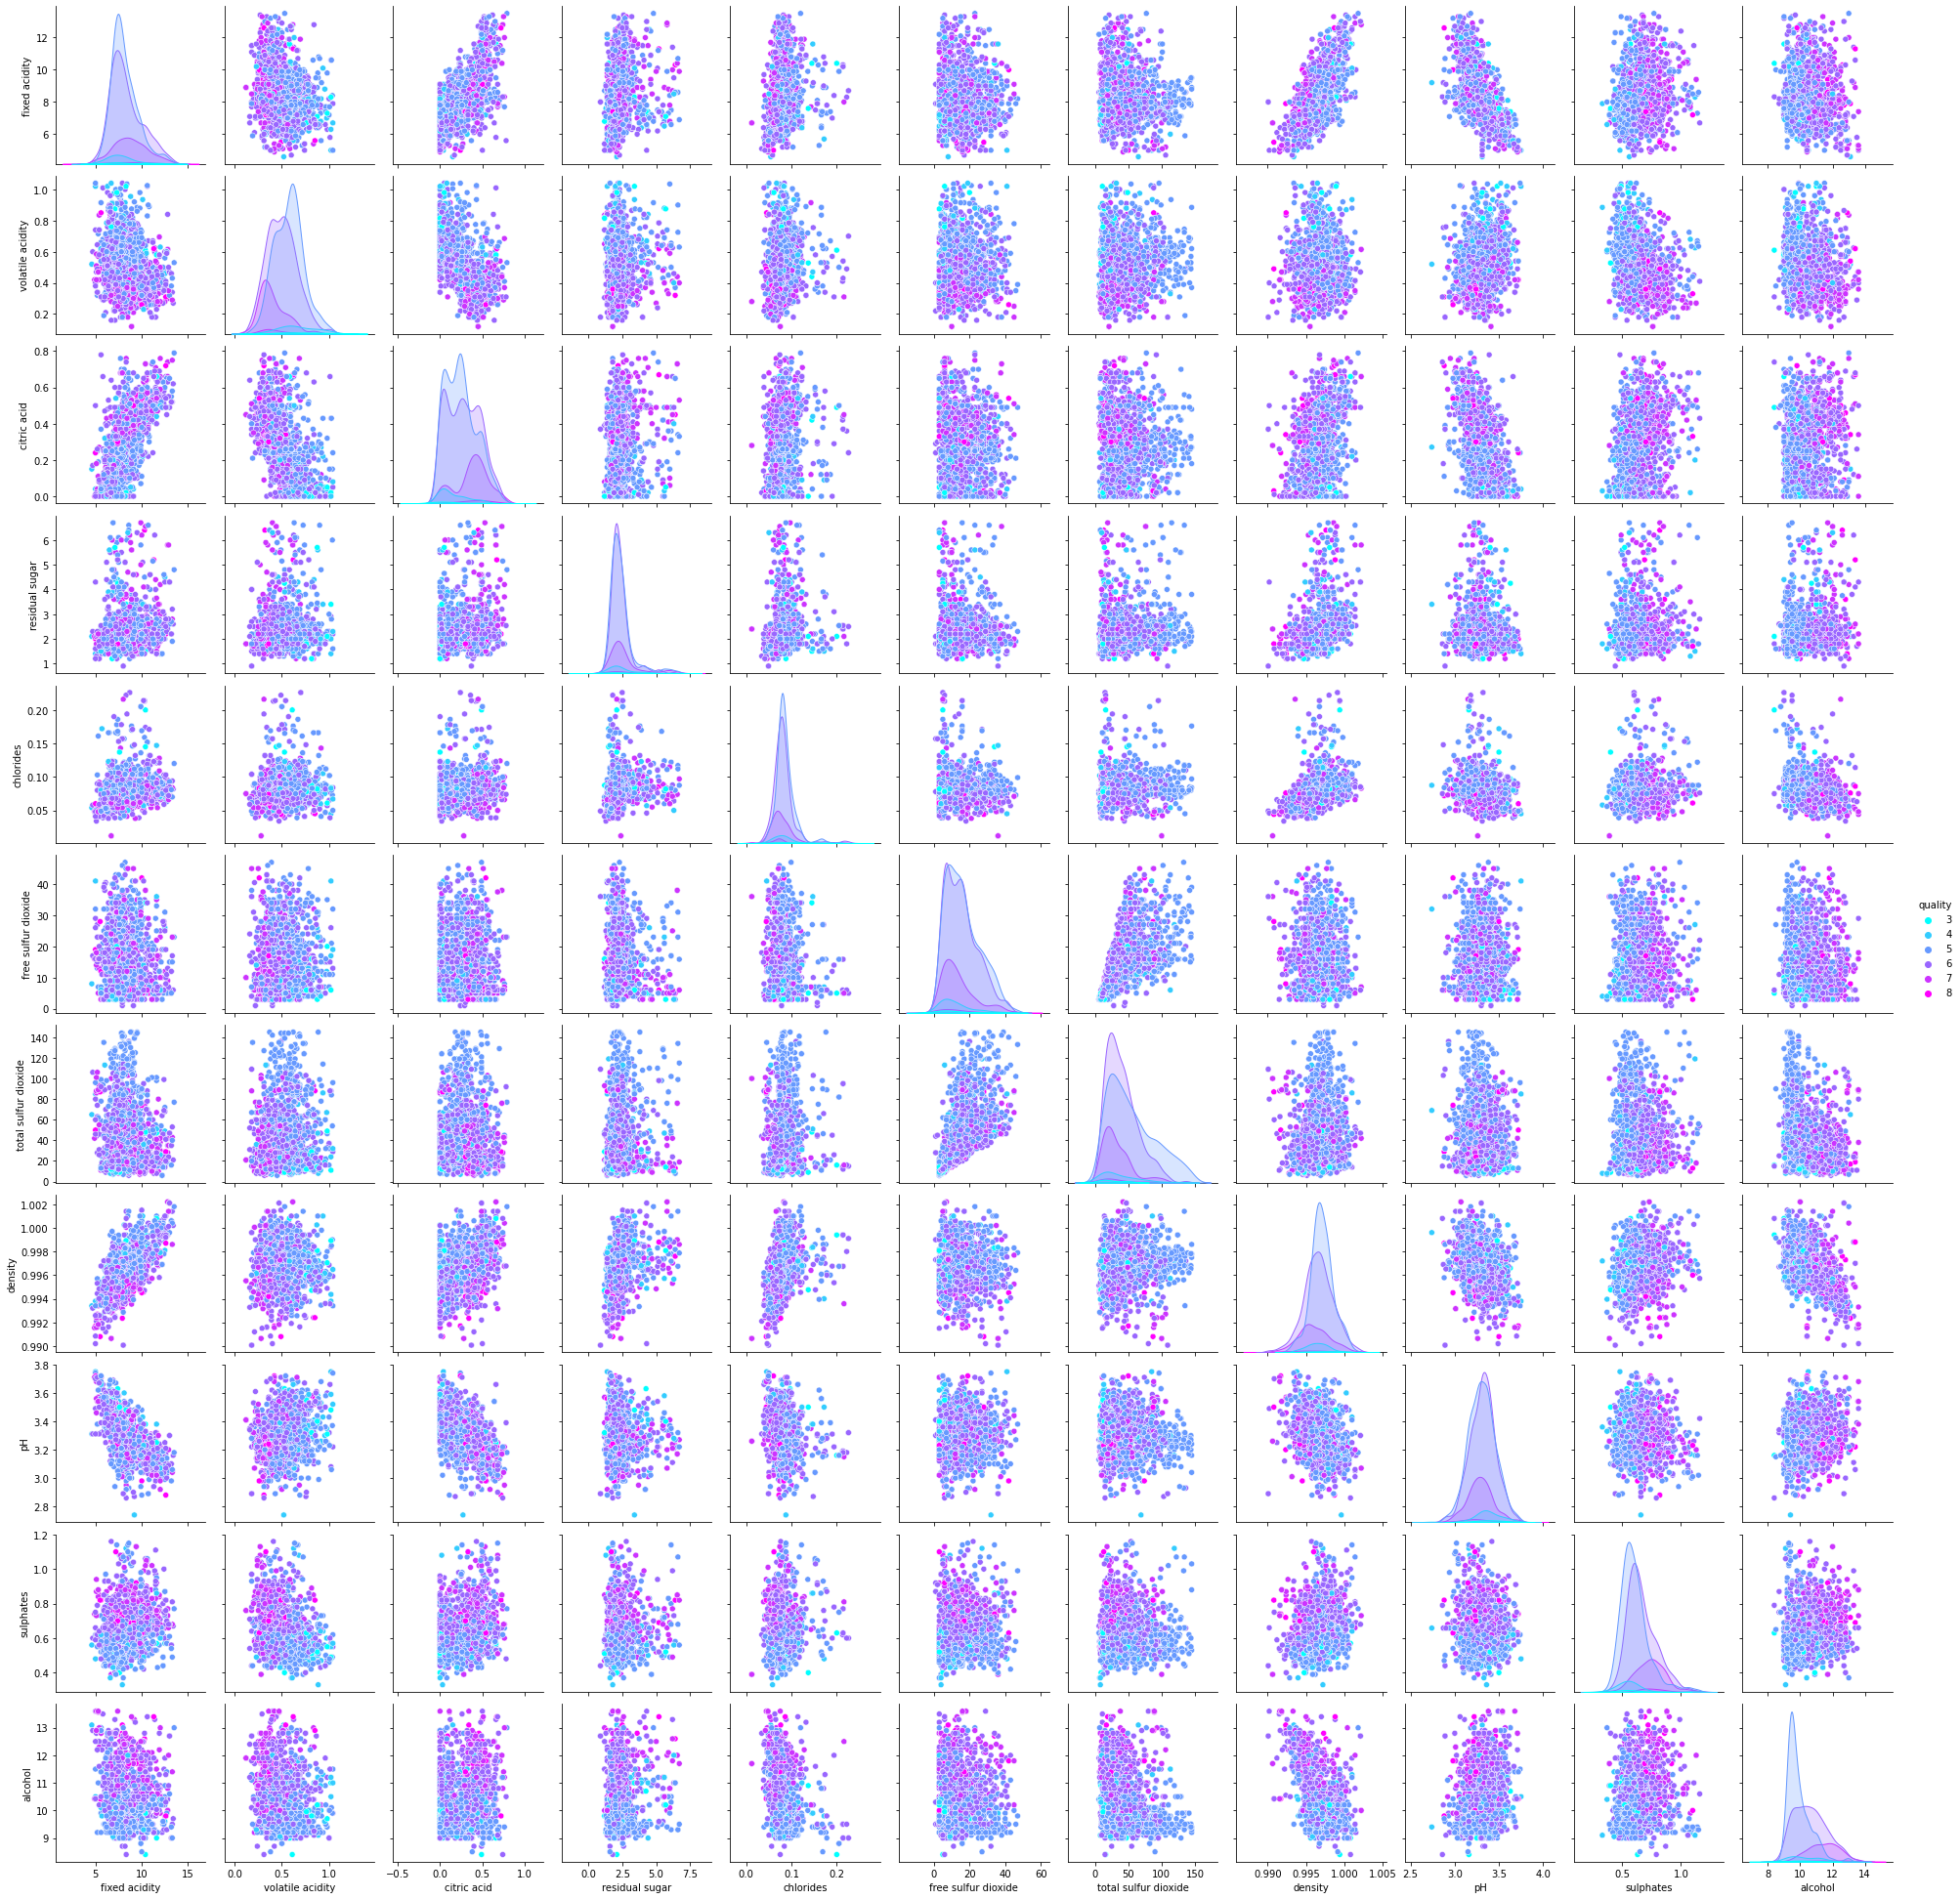

In [12]:
fig = plt.figure(figsize=(15,7))
sns.pairplot(df,hue='quality',palette="cool")

### Data Preparation

In [13]:
x = df.drop('quality',axis=1)
Y = df['quality']
x = scale(x)
y = scale(Y)
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size = 0.2,random_state=44)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>
<li>Implement a Neural Network using Tensorflow and Keras to classify wine quality</li>

### Regression

### Decision Tree Regressor

In [14]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, Y_train)
dtr_pred = dtr.predict(x_test)

### RandomForestRegressor

In [15]:
rfr = RandomForestRegressor(random_state=1)
rfr.fit(x_train, Y_train)
rfr_pred = rfr.predict(x_test)

### Neural Network

In [16]:
ann = Sequential()
ann.add(tf.keras.layers.Input(shape = 11,))
ann.add(tf.keras.layers.Dense(32,activation = 'relu'))
ann.add(tf.keras.layers.Dense(64,activation = 'relu'))
ann.add(tf.keras.layers.Dropout(0.3))
ann.add(tf.keras.layers.Dense(128,activation = 'relu'))
ann.add(tf.keras.layers.Dense(256,activation = 'relu'))
ann.add(tf.keras.layers.Dropout(0.3))
ann.add(tf.keras.layers.Dense(6,activation = 'softmax'))

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y_train = le.fit_transform(Y_train)
y_test = le.transform(Y_test)
y_train = pd.DataFrame(y_train.reshape(len(y_train),1))
y_test = pd.DataFrame(y_test.reshape(len(y_test),1))
y_train = tf.keras.utils.to_categorical(y_train,6)
y_test = tf.keras.utils.to_categorical(y_test,6)

ann.compile(optimizer= 'adam',loss = 'categorical_crossentropy', metrics = 'accuracy')

history = ann.fit(x_train,y_train, validation_split=0.3,epochs =300, verbose =0)

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


**Regression model evaluation metrics**

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

**Classification model evaluation metrics**

<img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm">

*TODO*

**For Regression models**
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

**For Classification model**
<li> Plot training loss and validation loss </li>
<li> Plot training accuracy and validation accuracy </li>
<li> Evaluate the classsification model using Precision, Recall and Accuracy metrics </li>

### Regression models

#### Random Forest:

In [17]:
score = rfr.score(x_train, Y_train)
print("R-squared:", score) 
mse = mean_squared_error(Y_test, rfr_pred)
mae = mean_absolute_error(Y_test, rfr_pred)
print("MAE: ", mae)
print("RMSE: ", math.sqrt(mse))

R-squared: 0.9269550459741979
MAE:  0.48103125
RMSE:  0.6508828139534796


#### Decision Tree:

In [18]:
score = dtr.score(x_train, Y_train)
print("R-squared:", score) 
dtr_pred = dtr.predict(x_test)
mse = mean_squared_error(Y_test, dtr_pred)
mae = mean_absolute_error(Y_test, dtr_pred)
print("MAE: ", mae)
print("RMSE: ", math.sqrt(mse))

R-squared: 1.0
MAE:  0.603125
RMSE:  0.9134412953222555


#### Model comparison

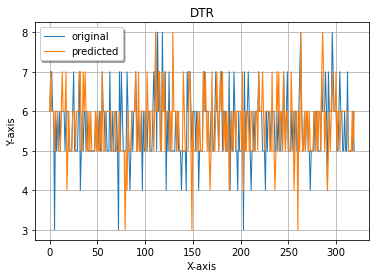

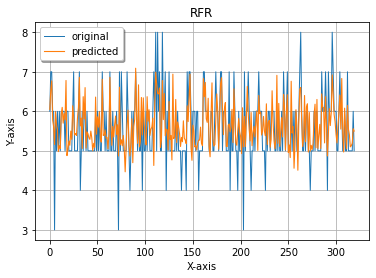

In [19]:
x_ax = range(len(Y_test))
plt.plot(x_ax, Y_test, linewidth=1, label="original")
plt.plot(x_ax, dtr_pred, linewidth=1.1, label="predicted")
plt.title("DTR")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

x_ax = range(len(Y_test))
plt.plot(x_ax, Y_test, linewidth=1, label="original")
plt.plot(x_ax, rfr_pred, linewidth=1.1, label="predicted")
plt.title("RFR")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

==> DTR has higher R-squared value than RFR. However, both MAE and RMSE are higher in model 2. 

#### Feature importance

In [20]:
importance = rfr.feature_importances_
for i,v in enumerate(importance):
    print('Feature:', ' ' , f1[i] , ',  Score:' , v)

Feature:   fixed acidity ,  Score: 0.043458824529420376
Feature:   volatile acidity ,  Score: 0.10760414264950321
Feature:   citric acid ,  Score: 0.04937041957788444
Feature:   residual sugar ,  Score: 0.056847074775749316
Feature:   chlorides ,  Score: 0.06374412681393528
Feature:   free sulfur dioxide ,  Score: 0.0485076339227822
Feature:   total sulfur dioxide ,  Score: 0.08200833510708372
Feature:   density ,  Score: 0.054581344499679905
Feature:   pH ,  Score: 0.05651521596433018
Feature:   sulphates ,  Score: 0.15223123543403178
Feature:   alcohol ,  Score: 0.2851316467255996


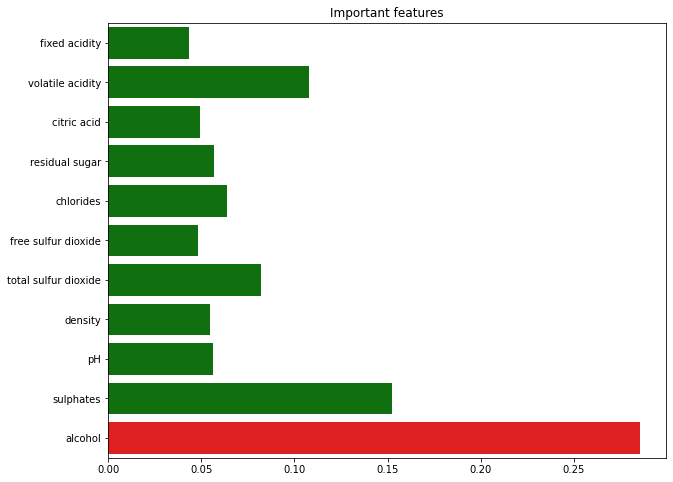

In [21]:
values = importance
idx = f1
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features')
plt.show()

#### Classification Model

In [22]:
y_pred = ann.predict(x_test)
y_pred = [np.round(value) for value in y_pred]
print(classification_report(y_test, y_pred))

10/10 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.11      0.08      0.09        13
           2       0.66      0.65      0.65       143
           3       0.53      0.56      0.54       120
           4       0.43      0.42      0.42        36
           5       1.00      0.20      0.33         5

   micro avg       0.56      0.55      0.56       320
   macro avg       0.45      0.32      0.34       320
weighted avg       0.56      0.55      0.55       320
 samples avg       0.55      0.55      0.55       320



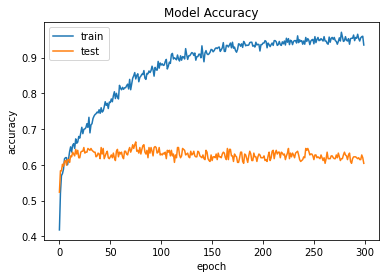

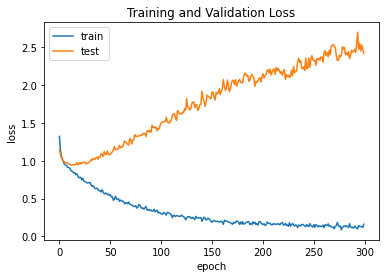

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Conclusion

*TODO*

Volatile Acidity, Sulphates, and Alcohol are important in terms of wine quality. Wines with higher quality will have higher Alcohol, lower Volatile Acidity and Sulphates.